In [1]:
import os
os.getcwd()


'C:\\Users\\SHRAAVYA MALLARAM\\Documents'

In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)

# Assign column names
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Show first 5 rows
df.head()



,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df = df[['target', 'text']]
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)
df.head()




,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [12]:
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+|#', '', text)  # remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['target', 'clean_text']].head()


,target,clean_text
0,0,awww thats a bummer you shoulda got david carr...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i her...


In [13]:
df['sentiment'] = df['target'].apply(lambda x: 'positive' if x == 4 else 'negative')
df[['sentiment', 'clean_text']].head()


,sentiment,clean_text
0,negative,awww thats a bummer you shoulda got david carr...
1,negative,is upset that he cant update his facebook by t...
2,negative,i dived many times for the ball managed to sav...
3,negative,my whole body feels itchy and like its on fire
4,negative,no its not behaving at all im mad why am i her...


In [14]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'sklearn'

In [17]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [20]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 1280000
Testing set size: 320000


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Create a pipeline that vectorizes the text and applies Logistic Regression
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'negative'

In [24]:
df['sentiment'].value_counts()


sentiment
negative    1600000
Name: count, dtype: int64

In [25]:
import pandas as pd

column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df.columns = column_names
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [26]:
# 0 → negative, 4 → positive
df['sentiment'] = df['target'].map({0: 'negative', 4: 'positive'})
df['sentiment'].value_counts()


sentiment
negative    800000
positive    800000
Name: count, dtype: int64

In [27]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove @mentions
    text = re.sub(r"[^A-Za-z\s]", "", text)  # keep only letters
    text = text.lower()  # lowercase
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)
df[['clean_text', 'sentiment']].head()


,clean_text,sentiment
0,awww thats a bummer you shoulda got david car...,negative
1,is upset that he cant update his facebook by t...,negative
2,i dived many times for the ball managed to sav...,negative
3,my whole body feels itchy and like its on fire,negative
4,no its not behaving at all im mad why am i her...,negative


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Split the data
X = df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.790521875


In [31]:
sample_texts = ["I love this product!", "This is the worst experience ever."]
predictions = model.predict(sample_texts)
print(predictions)


['positive' 'negative']


In [32]:
import joblib
joblib.dump(model, "sentiment_model.pkl")


['sentiment_model.pkl']

In [35]:
!pip install tweepy


Defaulting to user installation because normal site-packages is not writeable


In [53]:
import tweepy
import requests


In [54]:
requests.packages.urllib3.disable_warnings()



In [55]:
client = tweepy.Client(
    bearer_token="AAAAAAAAAAAAAAAAAAAAAIKI0QEAAAAAFHOBuEKSAlkx25xmc2VPcYD2jhk%3Dw3LtzuLRjk9vMLHFFthPebmFC1ppyerdmgJkKk6lntV54iQk5G",
    wait_on_rate_limit=True
)



In [59]:
import tweepy

# Replace with your actual Twitter API bearer token
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAIKI0QEAAAAAFHOBuEKSAlkx25xmc2VPcYD2jhk%3Dw3LtzuLRjk9vMLHFFthPebmFC1ppyerdmgJkKk6lntV54iQk5G"

# Initialize the Tweepy Client
client = tweepy.Client(bearer_token=BEARER_TOKEN, wait_on_rate_limit=True)

# Fetch user details (replace with any valid Twitter username)
try:
    response = client.get_user(username="TwitterDev", user_fields=["id", "name", "username"])
    print(response.data)
except tweepy.TweepyException as e:
    print("Error:", e)



SSLError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /2/users/by/username/TwitterDev?user.fields=id%2Cname%2Cusername (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1018)')))

In [59]:
import tweepy

# Replace with your actual Twitter API bearer token
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAIKI0QEAAAAAFHOBuEKSAlkx25xmc2VPcYD2jhk%3Dw3LtzuLRjk9vMLHFFthPebmFC1ppyerdmgJkKk6lntV54iQk5G"

# Initialize the Tweepy Client
client = tweepy.Client(bearer_token=BEARER_TOKEN, wait_on_rate_limit=True)

# Fetch user details (replace with any valid Twitter username)
try:
    response = client.get_user(username="TwitterDev", user_fields=["id", "name", "username"])
    print(response.data)
except tweepy.TweepyException as e:
    print("Error:", e)



SSLError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /2/users/by/username/TwitterDev?user.fields=id%2Cname%2Cusername (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1018)')))

In [60]:
pip install --upgrade certifi


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
!python -c "import certifi; print(certifi.where())"


C:\Users\SHRAAVYA MALLARAM\AppData\Roaming\Python\Python313\site-packages\certifi\cacert.pem


In [66]:
import os

os.environ["REQUESTS_CA_BUNDLE"] = r"C:\Users\SHRAAVYA MALLARAM\AppData\Roaming\Python\Python313\site-packages\certifi\cacert.pem"


In [72]:
!pip install langchain



Defaulting to user installation because normal site-packages is not writeable


In [3]:
pip install langchain langchain-community


  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ----------------------------- ---------- 1.8/2.5 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 9.1 MB/s eta 0:00:00
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
Using cached marshmallow-3.26.1-py3-none-any.whl (50 kB)
Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)

   ----------------------------------------  0/15 [python-dotenv]
   ----------------------------------------  0/15 [python-dotenv]
   -- -------------------------------------  1/15 [propcache]
   ---------- -----------------------------  4/15 [marshmal

In [24]:
pip install langchain


  Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached zstandard-0.23.0-cp313-cp313-win_amd64.whl.metadata (3.0 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 3.4 MB/s eta 0:00:00
Using cached jsonpatch-1.33-py2.py3-none-any.whl (12 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------- -------

In [75]:
pip install langchain langchain-community


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 2.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.5 MB 2.4 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.5 MB 2.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.5 MB 2.1 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install openai langchain-openai


Defaulting to user installation because normal site-packages is not writeable


In [1]:
from langchain_openai import OpenAI


In [4]:
!pip install langchain langchain-openai openai


Defaulting to user installation because normal site-packages is not writeable


In [19]:
import pandas as pd

# Sample social media data
data = {
    "post": [
        "I love the new education policy by the government!",
        "This political party never fails to disappoint.",
        "The election debate was alright, nothing new.",
        "Such a progressive bill passed today!",
        "Corruption at its peak, sad state of affairs.",
        "Hope the new reforms actually work this time."
    ],
    "sentiment": [
        "positive",
        "negative",
        "neutral",
        "positive",
        "negative",
        "neutral"
    ]
}

df = pd.DataFrame(data)
df


,post,sentiment
0,I love the new education policy by the governm...,positive
1,This political party never fails to disappoint.,negative
2,"The election debate was alright, nothing new.",neutral
3,Such a progressive bill passed today!,positive
4,"Corruption at its peak, sad state of affairs.",negative
5,Hope the new reforms actually work this time.,neutral


In [20]:
import re

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df["clean_post"] = df["post"].apply(preprocess)
df[["post", "clean_post", "sentiment"]]


,post,clean_post,sentiment
0,I love the new education policy by the governm...,i love the new education policy by the government,positive
1,This political party never fails to disappoint.,this political party never fails to disappoint,negative
2,"The election debate was alright, nothing new.",the election debate was alright nothing new,neutral
3,Such a progressive bill passed today!,such a progressive bill passed today,positive
4,"Corruption at its peak, sad state of affairs.",corruption at its peak sad state of affairs,negative
5,Hope the new reforms actually work this time.,hope the new reforms actually work this time,neutral


In [22]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

df["predicted_sentiment"] = df["clean_post"].apply(get_sentiment)
df[["clean_post", "predicted_sentiment"]].head()


Defaulting to user installation because normal site-packages is not writeable


,clean_post,predicted_sentiment
0,i love the new education policy by the government,positive
1,this political party never fails to disappoint,positive
2,the election debate was alright nothing new,positive
3,such a progressive bill passed today,neutral
4,corruption at its peak sad state of affairs,negative


In [26]:
!pip install matplotlib



Defaulting to user installation because normal site-packages is not writeable


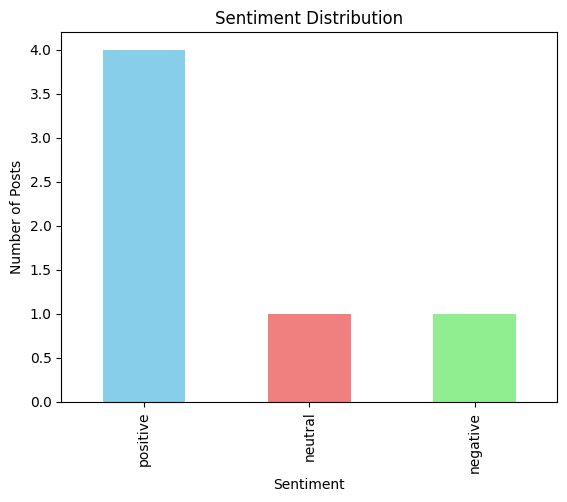

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

df['predicted_sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()



In [32]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [34]:
import seaborn as sns

# Add a new column that flags political keywords
df['has_political_keyword'] = df['text'].str.contains('bjp|congress|modi|rahul', case=False, na=False)

# Filter tweets that mention political keywords
political_df = df[df['has_political_keyword']]

# Plot sentiment distribution for these tweets
plt.figure(figsize=(8, 5))
sns.countplot(data=political_df, x='predicted_sentiment', palette='Set2')
plt.title('Sentiment Distribution for Tweets with Political Keywords')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


KeyError: 'text'

In [35]:
df.columns


Index(['post', 'sentiment', 'clean_post', 'predicted_sentiment'], dtype='object')

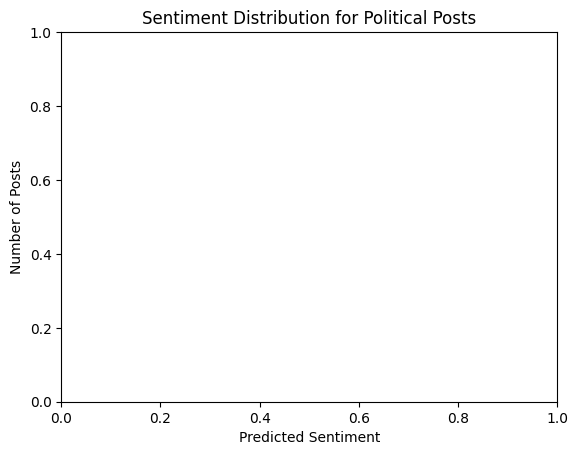

In [36]:
import seaborn as sns

# Add a new column that flags political keywords in 'post'
df['has_political_keyword'] = df['post'].str.contains('bjp|congress|modi|rahul', case=False, na=False)

# Filter posts that mention political keywords
political_df = df[df['has_political_keyword']]

# Show sentiment distribution for political posts
sns.countplot(data=political_df, x='predicted_sentiment', palette='Set2')
plt.title('Sentiment Distribution for Political Posts')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Number of Posts')
plt.show()


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Use CountVectorizer to get word frequencies from political posts
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(political_df['clean_post'])

# Get the words and their frequencies
keywords = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Plot the top keywords
plt.figure(figsize=(10, 5))
sns.barplot(x=frequencies, y=keywords, palette="pastel")
plt.title('Top Keywords in Political Posts')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [38]:
political_df[['clean_post']].head(10)


,clean_post


In [40]:
political_df[['clean_post']].dropna().head(10)


,clean_post


In [41]:
political_df['clean_post'].dropna().apply(lambda x: x.strip()).replace('', np.nan).dropna().shape


(0,)

In [43]:
# Show actual "post" column for political posts
df[df['post'].str.contains('election|bjp|congress|modi|rahul|vote|campaign|manifesto|nda|upa', case=False, na=False)][['post']].head(10)


,post
2,"The election debate was alright, nothing new."


In [44]:
political_keywords = (
    'bjp|congress|modi|rahul|election|vote|voting|india|campaign|manifesto|'
    'politics|government|nda|upa|aap|parliament|party|seat|mp|mla'
)


In [46]:
political_df = df[df['post'].str.contains(political_keywords, case=False, na=False)]
print("Political posts found:", political_df.shape[0])



Political posts found: 3


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['clean_post'].dropna())
keywords = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Create a DataFrame to display the keywords and their counts
keyword_df = pd.DataFrame({'Keyword': keywords, 'Frequency': frequencies})
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)
keyword_df


,Keyword,Frequency
12,new,3
0,actually,1
2,alright,1
1,affairs,1
3,corruption,1
4,debate,1
6,education,1
5,disappoint,1
8,fails,1
9,government,1


In [50]:
!pip install wordcloud



Defaulting to user installation because normal site-packages is not writeable


In [54]:
from wordcloud import WordCloud


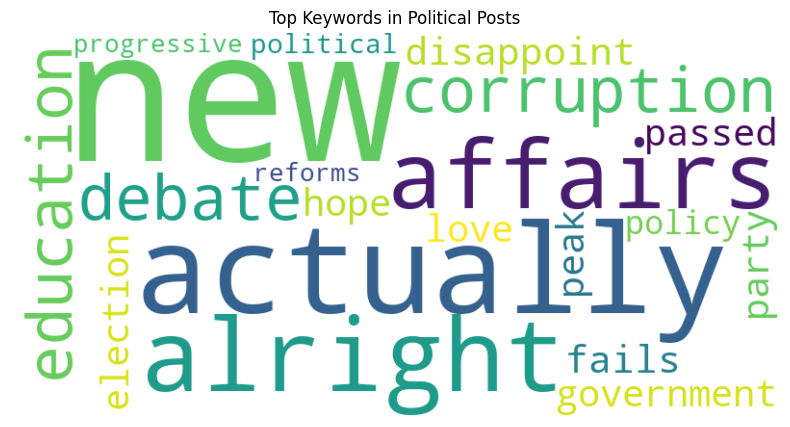

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of keywords and their frequencies
word_freq_dict = dict(zip(keyword_df['Keyword'], keyword_df['Frequency']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Political Posts')
plt.show()


In [ ]:
!pip install gensim pyLDAvis


In [ ]:
!pip install gensim



In [17]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    return [lemmatizer.lemmatize(word) for word in simple_preprocess(text) if word not in STOPWORDS]

processed_docs = political_df['clean_post'].dropna().apply(preprocess)


ModuleNotFoundError: No module named 'gensim'

In [16]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk

nltk.download('wordnet')


ModuleNotFoundError: No module named 'gensim'

In [15]:
# Define the functions
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            lemma = lemmatizer.lemmatize(token)
            stem = stemmer.stem(lemma)
            result.append(stem)
    return result

# Apply preprocessing to the political posts
processed_docs = political_df['clean_post'].dropna().apply(preprocess)
processed_docs[:5]


NameError: name 'PorterStemmer' is not defined

In [ ]:
processed_docs[:5]


In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
print(df.head())  # to verify it's loaded correctly


                                                post sentiment        topic  \
0  I love the new education policy by the governm...  positive    education   
1    This political party never fails to disappoint.  negative      general   
2      The election debate was alright, nothing new.   neutral    elections   
3              Such a progressive bill passed today!  positive  legislation   
4      Corruption at its peak, sad state of affairs.  negative   corruption   

     party  
0  Party A  
1  Party B  
2  Party A  
3  Party B  
4  Party C  


In [6]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data.csv")

# Show the raw data
st.subheader("📄 Raw Dataset")
st.write(df)

# Group by party and sentiment
grouped = df.groupby(['party', 'sentiment']).size().unstack().fillna(0)

# Show bar chart
st.subheader("📊 Sentiment by Party")
st.bar_chart(grouped)


2025-07-26 11:53:55.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:53:55.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:53:55.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:53:55.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:53:55.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:53:55.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:53:55.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:53:55.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [4]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ------------- --

In [7]:
import matplotlib.pyplot as plt

grouped = df.groupby(['party', 'sentiment']).size().unstack().fillna(0)
st.write("Sentiment by Party")
st.bar_chart(grouped)


2025-07-26 11:54:17.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:54:17.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:54:17.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:54:17.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:54:17.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 11:54:17.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

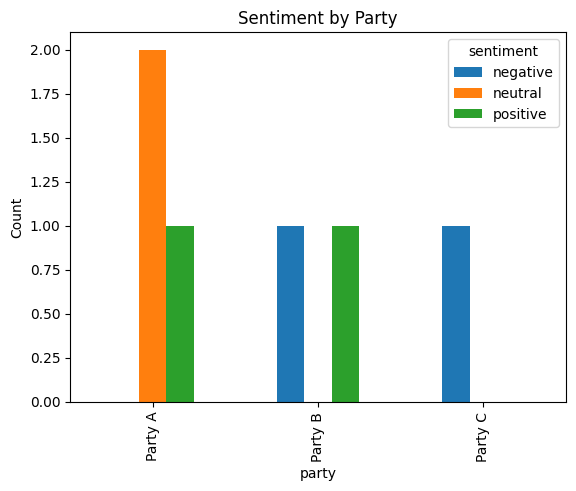

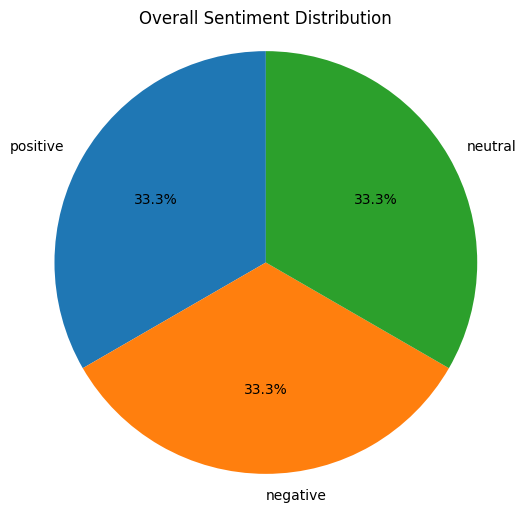

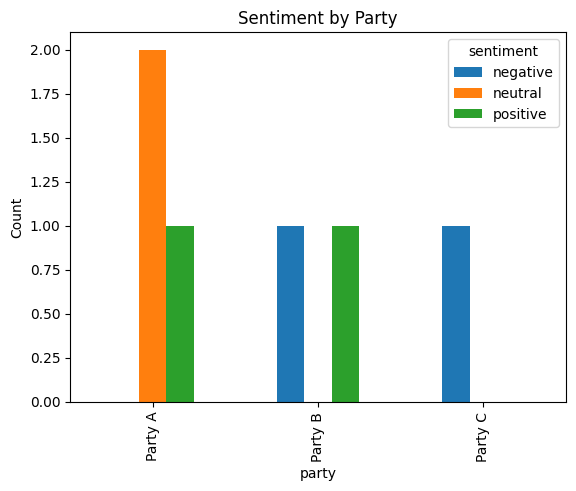

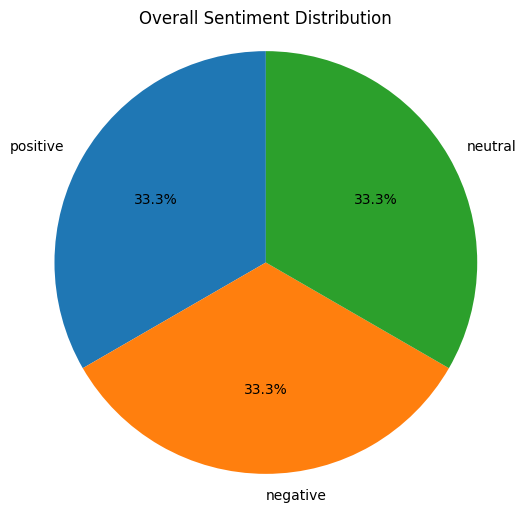

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Bar chart using pandas
grouped.plot(kind='bar')
plt.title("Sentiment by Party")
plt.ylabel("Count")
plt.show()

# Pie chart
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Overall Sentiment Distribution")
plt.show()





In [11]:
!pip install wordcloud


  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)


In [16]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.
